# Keras构建CNN卷积神经网络模型

In [6]:
import keras
import tensorflow as tf
#导入数据集y为标签label
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#将输入从三维转换成四维，为了参数对应
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# 确保数据为浮点数
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 标准化，对数据除以RGB的最大值255
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
# 引入Keras的模型和神经网络模块
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,AveragePooling2D,BatchNormalization

# 建立模型，添加层
model = models.Sequential()#序列化模型，可添加子层

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))#卷积层
model.add(layers.MaxPooling2D((2, 2)))#池化层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#卷积层
model.add(layers.MaxPooling2D((2, 2)))#池化层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))#卷积层
model.add(layers.Flatten())#将神经元平铺成一维
model.add(layers.Dense(64, activation='relu'))#全连接层
model.add(layers.Dense(10, activation='softmax'))
model.summary()

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3) #三次loss不下降，停止训练防止过拟合
from keras.utils.np_utils import to_categorical #one-hot编码
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
#模型编译
model.compile(optimizer = 'rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=train_labels, epochs=1,validation_split=0.1,batch_size=64,callbacks=[early_stopping_monitor])#训练
model.evaluate(x_test, test_labels)#测试集评估


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________________

KeyboardInterrupt: 

# 参数记录

In [ ]:
#conv2d filters   params=filters*(kernel_size+1)   每个filter可以扫描出一个feature_map
#28--- loss: 0.0186 - acc: 0.9938  [0.06778051725444784, 0.9847]
#29--- loss: 0.0173 - acc: 0.9941  test--[0.07050148819618007, 0.9846]
#30--- loss: 0.0172 - acc: 0.9938   [0.06629470550860715, 0.9839]
#31--- loss: 0.0167 - acc: 0.9942    [0.05702013949425709, 0.9848]
#100--- loss: 0.0226 - acc: 0.9928    [0.06738713760798164, 0.9862]

#kernel_size 
#3*3---loss: 0.0373 - acc: 0.9878  test--[0.057116816672185086, 0.9827]
#2*2---loss: 0.0461 - acc: 0.9850  test--[0.06145344776376151, 0.9808]
#4*4---loss: 0.0378 - acc: 0.9877  test--[0.05217231560021173, 0.9826]
#5*5---loss: 0.0349 - acc: 0.9885  test--[0.052394016157450096, 0.9836]
#6*6---loss: 0.0394 - acc: 0.9868  test--[0.04841918063859921, 0.9858]
#10*10---loss: 0.0517 - acc: 0.9838  test--[0.047379985728814064, 0.9864]
#8*8---182us/step - loss: 0.0436 - acc: 0.9861  test--[0.05693629395666867, 0.9848]

#strides
#1---loss: 0.0382 - acc: 0.9879  test--[0.055256726280161816, 0.9846]
#2---loss: 0.0446 - acc: 0.9859  test--[0.045459636151290034, 0.9847]
#3---loss: 0.0948 - acc: 0.9698  test--[0.09060433291681111, 0.971]

#max_pooling loss: 0.0186 - acc: 0.9938  [0.06778051725444784, 0.9847]
#averge_pooling loss: 0.0784 - acc: 0.9754  [0.07759693743688986, 0.9782]
#pool_size
#2*2 loss: 0.0186 - acc: 0.9938  [0.06778051725444784, 0.9847]
#3*3 loss: 0.0344 - acc: 0.9888  [0.050204426674469144, 0.9843]

#dropout
#0.2 loss: 0.0186 - acc: 0.9938  [0.06778051725444784, 0.9847]
#去掉 loss: 0.0183 - acc: 0.9946  [0.05792167397257581, 0.9829]
#0.4 loss: 0.0586 - acc: 0.9810   [0.05149758172885631, 0.9841]
 
#Dense


#fit 
#split 0.1  loss: 0.0367 - acc: 0.9876 [0.05441510101031454, 0.9834]
#batch_size 64  loss: 0.0112 - acc: 0.9964  [0.0529375893643195, 0.9863]
#batch_size 10  loss: 0.0994 - accuracy: 0.9751   [0.11847016602325457, 0.974399983882904]
#batch_size 32  loss: 0.0635 - accuracy: 0.9813 [0.078849048965174, 0.9797999858856201]
#batch_size 128 loss: 0.0616 - accuracy: 0.9814 [0.059061556967813525, 0.9807999730110168]
#batch_size none 

#99.15

# 识别白纸黑字手写数字模型

In [8]:
'''
-----------
识别主体
-----------
'''
# 根据长向量找出顶点
# 反相灰度图，将黑白阈值颠倒
from keras import models
from keras import layers
import numpy as np
from keras.utils.np_utils import to_categorical
import cv2
def accessPiexl(img):
    height = img.shape[0]
    width = img.shape[1]
    for i in range(height):
       for j in range(width):
           img[i][j] = 255 - img[i][j]
    return img

# 反相二值化图像
def accessBinary(img, threshold=128):
    img = accessPiexl(img)
    # 边缘膨胀，不加也可以
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    _, img = cv2.threshold(img, threshold, 0, cv2.THRESH_TOZERO)
    return img


# 显示结果及边框
def showResults(path, borders, results=None):
    img = cv2.imread(path)
    # 绘制
    print(img.shape)
    for i, border in enumerate(borders):
        cv2.rectangle(img, border[0], border[1], (0, 0, 255))
        if results:
            cv2.putText(img, str(results[i]), border[0], cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        #cv2.circle(img, border[0], 1, (0, 255, 0), 0)
    cv2.imshow('test', img)
    cv2.waitKey(0)
# 寻找边缘，返回边框的左上角和右下角（利用cv2.findContours）
def findBorderContours(path, maxArea=50):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = accessBinary(img)
    _ ,contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    borders = []
    for contour in contours:
        # 将边缘拟合成一个边框
        x, y, w, h = cv2.boundingRect(contour)
        if w*h > maxArea:
            border = [(x, y), (x+w, y+h)]
            borders.append(border)
    return borders
# 根据边框转换为MNIST格式
def transMNIST(path, borders, size=(28, 28)):
    imgData = np.zeros((len(borders), size[0], size[0], 1), dtype='uint8')
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = accessBinary(img)
    for i, border in enumerate(borders):
        borderImg = img[border[0][1]:border[1][1], border[0][0]:border[1][0]]
        # 根据最大边缘拓展像素
        extendPiexl = (max(borderImg.shape) - min(borderImg.shape)) // 2
        targetImg = cv2.copyMakeBorder(borderImg, 7, 7, extendPiexl + 7, extendPiexl + 7, cv2.BORDER_CONSTANT)
        targetImg = cv2.resize(targetImg, size)
        targetImg = np.expand_dims(targetImg, axis=-1)
        imgData[i] = targetImg
    return imgData

path = 'test4.png'
borders = findBorderContours(path)
imgData = transMNIST(path, borders)
#for i, img in enumerate(imgData):
   
    #name = '/Users/apple/mydata/' + str(i+74) + '.png'
    #cv2.imwrite(name, img)
    
# 预测手写数字
def predict(modelpath, imgData):
    from keras import models
    my_mnist_model = models.load_model(modelpath)
    print(my_mnist_model.summary())
    img = imgData.astype('float32') / 255

    results = my_mnist_model.predict(img)
    result_number = []
    for result in results:
        result_number.append(np.argmax(result))
    return result_number

#model = 'my_mnist_model.h5'
results = predict(model, imgData)
showResults(path, borders, results)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_17 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)       

# 滴水算法分割连笔字

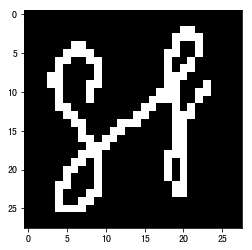

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_path = '/Users/apple/drop_split.png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
_, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(bin_img, cmap='gray')
plt.show()

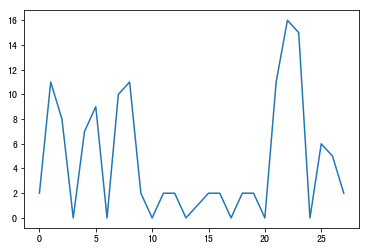

In [28]:
def binImgHist(img, bin_width=1, direction=1):
    '''
        二值化图像在y轴或者x轴方向的投影统计
    '''
    height, width = img.shape
    bins = None
    if direction == 0:
        # 在y轴方向上统计
        bins = int(height / bin_width)
    else:
        bins = int(width / bin_width)
    # 获取非零元素坐标
    nonzero_points = np.nonzero(img != 0)
    # 获取非零元素坐标中的x坐标集合或者y坐标集合
    nonzero_idx_x = nonzero_points[direction]
    #返回的统计直方图
    hist = np.histogram(np.int64(nonzero_idx_x), bins=bins)[0]

    return hist

bin_width = 1
hist = binImgHist(bin_img, bin_width=bin_width, direction=1)
plt.plot(hist)
plt.show()

In [29]:
height,width = img.shape
mid_x = int(width / 2)
search_win = 2
start_x = np.argmin(hist[mid_x - search_win:mid_x + search_win + 1]) + (mid_x - search_win)

print(start_x)

13


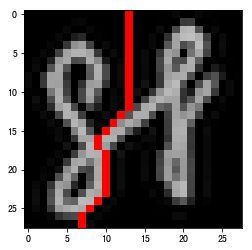

In [30]:
COLOR_BACK = 0 # 背景颜色
COLOR_PEN = 255 # 笔触的颜色

# 首先将原来的图片转换成布尔矩阵
bool_img = bin_img == COLOR_PEN

# 展示部分， 只有0跟1组成的矩阵
bool_img[45:50,45:50]

# 定义邻居坐标 的位置关系
NEIGHBOR_IDX = {
    1: (-1, 0),
    2: (-1, 1),
    3: (0, 1),
    4: (1, 1),
    5: (1, 0)
}
# 判断点是否重复出现，左右往复平移
#if next_pt in split_path:
    # 已经判断重复，进行渗透
    #next_pt = (cur_pt[0],cur_pt[1]+1)
    # 定义邻居坐标 的位置关系
NEIGHBOR_IDX = {
    1: (-1, 0),
    2: (-1, 1),
    3: (0, 1),
    4: (1, 1),
    5: (1, 0)
}

# 根据不同优先级情况，对应的下一个点的位置 n_i
CASE_NEXT_POINT = {
    1: 3,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 1
}

def is_case_p1(n1, n2, n3, n4, n5):
    '''
    优先级 ：１
    下落方向：　正下方
    下落位置： n3
    备注：　全为背景或者全为笔迹
    '''
    if n1 and n2 and n3 and n4 and n5 == True:
        # 全为数字部分
        return True
    elif not(n1) and not(n2) and not(n3) and not(n4) and not(n5) == True:
        # 全为背景部分
        return True 
    return False

def is_case＿p2(n1, n2, n3, n4, n5):
    '''
    优先级 ：２
    下落方向：　左下方
    下落位置： n2
    备注：　n2点为背景，且其他点至少有一个为笔迹的颜色
    '''
    return not(n2) and (n1 or n3 or n4 or n5)

def is_case_p3(n1, n2, n3, n4, n5):
    '''
    优先级 ：3
    下落方向：　正下方
    下落位置： n３
    备注：　左下角为笔迹的颜色，正下方为背景色
    '''
    return n2 and not(n3)

def is_case_p4(n1, n2, n3, n4, n5):
    '''
    优先级 ：4
    下落方向：右下方
    下落位置： n4
    备注：　左下角跟正下方为笔迹的颜色，右下方为背景色
    '''
    return n2 and n3 and not(n4)

def is_case_p5(n1, n2, n3, n4, n5):
    '''
    优先级 ：5
    下落方向：右边
    下落位置： n5
    备注：下方全为笔迹颜色，且左边为背景色
    '''
    return n2 and n3 and n4 and not(n5)

def is_case_p6(n1, n2, n3, n4, n5):
    '''
    优先级 6
    下落方向：左边
    下落点：n1
    备注　除了左边是背景色，其他均为笔迹颜色
    '''
    return not(n1) and n2 and n3 and n4 and n5


def drop_fall(neighbors):
    '''
    传统滴水算法　　核心代码
    根据优先级实现
    neighbors = [n1, n2, n3, n4, n5]

    返回 ：下落点的邻居编号
    '''

    for priority in range(1,7):
        if eval('is_case_p{}(*neighbors)'.format(priority)):
            return CASE_NEXT_POINT[priority]


def is_legal_pt(img, x, y):
    '''
    是否为合法的坐标
    判断是否超出正常的数值范围
    '''
    h,w = img.shape
    if x < 0 or y < 0 or x >= w or y>= h:
        return False
    return True

def get_neighbors(bool_img, x, y):
    '''
    给定逻辑图跟坐标， 返回邻居的有序布尔数组
    '''
    neighbors = []
    for n_idx in range(1, 6):
        dx,dy = NEIGHBOR_IDX[n_idx]
        new_x, new_y = x + dx, y + dy
        if not is_legal_pt(bool_img, new_x, new_y):
            # 如果坐标不合法 填充背景
            neighbors.append(False)
        else:
            neighbors.append(bool_img[new_y][new_x])
    # print(neighbors)
    return neighbors

def get_split_path(bool_img, start_x):
    '''
    给出分割路径
    '''
    height, width = bool_img.shape # 获取图像的高度跟宽度
    min_x = 0 # x坐标的左边界
    max_x = width - 1 # x坐标的右边界
    max_y = height - 1
    # 当前的点
    cur_pt = (start_x, 0)
    # 最近的点
    last_pt = cur_pt
    # 分割路径
    split_path = [cur_pt]

    while cur_pt[1] < max_y:
        neighbors = get_neighbors(bool_img, cur_pt[0], cur_pt[1])
        n_idx = drop_fall(neighbors)
        dx, dy = NEIGHBOR_IDX[n_idx]
        next_pt = None
        next_x,next_y = cur_pt[0]+dx, cur_pt[1]+dy
        if not is_legal_pt(bool_img, next_x, next_y):
            # x/y越界 向下渗透
            next_pt = (cur_pt[0],cur_pt[1]+1)
        else:
            next_pt = (next_x, next_y)
        # 判断点是否重复出现，左右往复平移
        if next_pt in split_path:
            # 已经判断重复，进行渗透
            next_pt = (cur_pt[0],cur_pt[1]+1)

        cur_pt = next_pt
        split_path.append(cur_pt)
    return split_path
def view_split_result(img, split_path):
    canvas = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for (x, y) in split_path:
        canvas[y][x] = (0,0,255)
    return canvas

split_path = get_split_path(bool_img, start_x)
canvas = view_split_result(img, split_path)

plt.imshow(canvas[:,:,::-1])
plt.show()